# Описание Проекта

__Данные__

Исторические данные о продажах игр за 2016 г. 

Описание:
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — возрастной рейтинг ESRB (Entertainment Software Rating Board).

Данные за 2016 год могут быть неполными.

**Задача**

* Подготовить данные;
* Провести исследовательский анализ данных с целью выявить закономерности, определяющие успешность игры;
* Составить портрет пользователя каждого региона;
* Проверить гипотезы:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  * Средние пользовательские рейтинги жанров Action и Sports разные.



# Импорт библиотек

In [1198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

# Загрузка данных

In [1199]:
data = pd.read_csv("C:/Users/kbolo/Documents/Python Scripts/Yandex/04 - Игры/games.csv")

In [1200]:
data.head(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


In [1201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


---
Порядка 8 тысяч пропусков в последних 3-х столбцах с оценками и рейтингом.

Тип данных у User_score — Object.  
Наверное, в столбце вместе с числовыми, присутствует и текстовые значения.

In [1202]:
data.describe().round(3)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


---
Медиана продаж сильно меньше среднего во всех регионах, т.к. присутствуют редкие игры-хиты с очень высоким уровнем продаж (см. строчка `max`).

# Предобработка данных

## Дубликаты строк

In [1203]:
data.shape

(16715, 11)

In [1204]:
data = data.drop_duplicates()
data.shape

(16715, 11)

Дубликатов нет

## В нижний регистр
Перевожу названия столбцов в нижний регистр

In [1205]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## "name"

__Пропуски__ 

In [1206]:
data.loc[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Только две строки в которых отсутствует не только имя, но и жанр и все рейтинги.  
Удаляю.

In [1207]:
data = data.dropna(subset=['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


---
__Пробелы в имени игры__

В названиях присутствуют пробелы в начале и возможно в конце:

In [1208]:
data.name.sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio: Instant Artist', 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!'], dtype=object)

Кол-во уникальных имен:

In [1209]:
data.name.sort_values().unique().size

11559

Удаляю пробелы в имени:

In [1210]:
data.name = data.name.str.strip()
data.name.sort_values().unique()

array(["'98 Koshien", '.hack//G.U. Vol.1//Rebirth',
       '.hack//G.U. Vol.2//Reminisce', ...,
       'uDraw Studio: Instant Artist', 'wwe Smackdown vs. Raw 2006',
       '¡Shin Chan Flipa en colores!'], dtype=object)

In [1211]:
data.name.sort_values().unique().size

11559

Кол-во уникальных имен после удаления пробелов в имени — не изменилось.

## "platform"

Пропусков нет. См. выше. `data.info()`

Проверка на скрытые дубликаты и ошибочные значения:

In [1212]:
data.platform.sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

* DC и DS — разные платформы: \
DreamCast vs Nintendo DS

* GB и GBA — разные платформы:\
Game Boy  vs Game Boy Advance 

* Wii u WiiU — разные платформы
> The Wii U comes built-in with a much powerful 1.243GHz Triple-core PowerPC-based Espresso microprocessor. The Wii, on the other hand, was a 729MHz single core device with a Broadway microprocessor.

## "year_of_release"

In [1213]:
data.year_of_release.sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Явно ошибочных значений нет.  

__Пропуски__

In [1214]:
data[data.year_of_release.isna()].describe(percentiles=[0.5]).round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,0.0,269.00,269.00,269.00,269.00,154.00
mean,NaN,0.22,0.09,0.02,0.03,67.58
std,NaN,0.42,0.21,0.09,0.08,14.83
min,NaN,0.00,0.00,0.00,0.00,22.00
50%,NaN,0.09,0.02,0.00,0.01,70.00
max,NaN,4.26,2.36,0.77,0.71,94.00


269 пропусков = 1.6% от всех записей.\
Присутствуют игры с уровнем продаж приблизительно в 15-20 раз выше среднего по всей базе данных:\
Сравни `max` из таблицы выше и `mean` из таблицы ниже.\
Удалять не буду, т.к. это важная инф. для составления портрета пользователя по регионам.

In [1215]:
data.describe(percentiles=[0.5]).round(2)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.00,16713.00,16713.00,16713.00,16713.00,8137.00
mean,2006.49,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


Присутствие NaN не дает сконвертировать столбец в целочисленный формат `integer`. \
Оставляю как есть — с плавающей запятой.

## "genre"

In [1216]:
data.genre.sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Явно ошибочных значений нет.\
Сомнение вызывал жанр *Platform*, но Википедия пишет, что такой тип игр есть: 
> platform video game, is one that traditionally features two-dimensional graphics in which players control characters who jump or climb between different platforms on the screen. It's a subgenre of the Action category, which is one of the many different types of video games.

## столбцы "... sales"
Столбцы с продажами по регионам.\
Пропусков нет.

In [1217]:
data.iloc[:, [4,5,6,7]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   na_sales     16713 non-null  float64
 1   eu_sales     16713 non-null  float64
 2   jp_sales     16713 non-null  float64
 3   other_sales  16713 non-null  float64
dtypes: float64(4)
memory usage: 652.9 KB


## новый столбец - "total_sales"
Добавляю столбец c общими продажами сразу после столбцов с продажами по регионам_

In [1218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [1219]:
data.insert(loc= 8, column= 'total_sales',
            value= data.iloc[:,4:8].sum(axis= 1))

In [1220]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E


## "critic_score"

In [1221]:
data.critic_score.isna().sum(), len(data)

(8576, 16713)

8576 пропусков — больше половины от всех значений (16713)в базе данных.\
Удалить нельзя.\
Заполнить медианными, средними значениями - некорректно, т.к. это индивидуальные оценки.\
Оставляю пропуски как есть.

---
Проверяю на наличие зависимостей между пропусками в оценке критиков и другими признаками.\
Для этого создаю столбец с бинарным признаком: Оценка есть = True / Оценки нет = False

In [1222]:
data['score_exists'] = np.where(data.critic_score.isna(), 'No', 'Yes')

---
Количество игр по дате релиза:

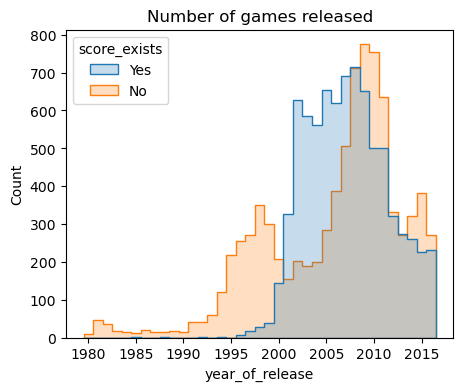

In [1223]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(data, x='year_of_release', hue='score_exists', discrete=True, element='step')
plt.title('Number of games released')
sns.move_legend(ax, 'upper left');

Для игр выпуска до 2000 года, в большинстве случаев рейтинг отсутствует.

---
Количество игр по жанрам

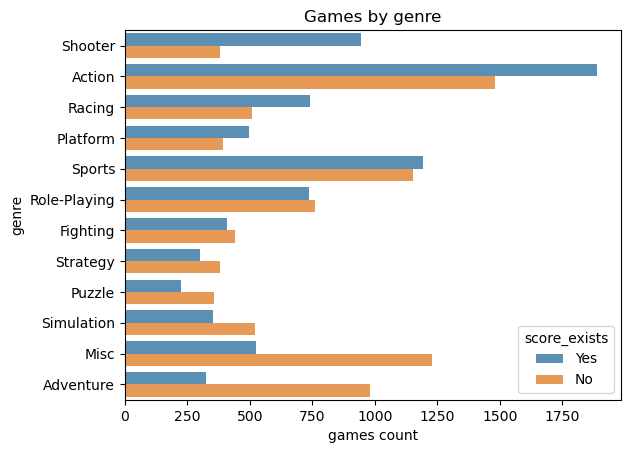

In [1224]:
genre =  data.genre.unique()

sns.countplot(data, y='genre', hue='score_exists', alpha=0.8,
              order=genre[[6, 8, 2, 1, 0, 3, 9, 11, 4, 7, 5, 10]])
plt.xlabel('games count')
plt.title('Games by genre');

Преобладание игр без рейтинга в жанре "Misc" = Разное.\
Скорее всего, сюда "сваливают" разные нишевые игры без четко выраженных жанров.

Преобладание игр без рейтинга в жанре "Adventure" = Приключения.

---
Проверяю, гипотезу, что отсутствие рейтинга в этих жанрах связано с тем, что много игр выходило до 2000 года.

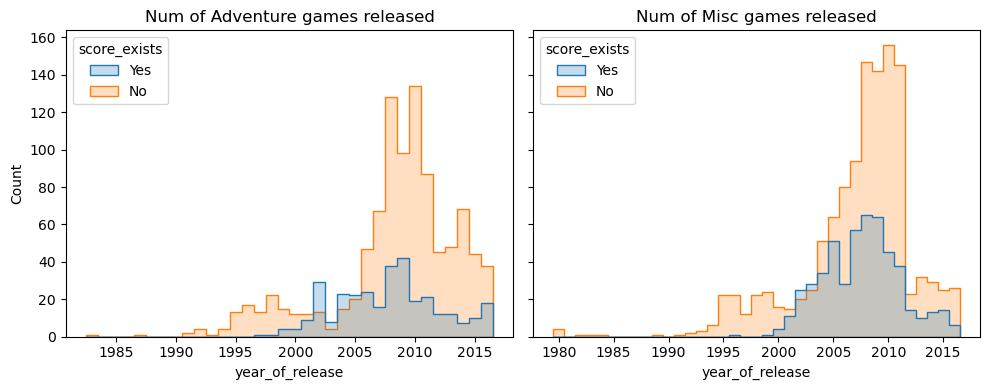

In [1225]:
fig, axs = plt.subplots(1, 2, figsize=(10,4), sharey=True)

for i, j in enumerate(['Adventure', 'Misc']):
    sns.histplot(data.query('genre == @j'), x='year_of_release', 
                 hue='score_exists', hue_order=['Yes', 'No'], discrete=True, 
                 element='step', ax=axs[i], )
    axs[i].set_title('Num of '+ j + ' games released')
    sns.move_legend(axs[i], 'upper left')
plt.tight_layout()

Гипотеза не подтвердилась\
В обоих жанрах видно большое количество игр без рейтинга с датами релиза после 2000 года.

---
Строю распределение по продажам игр этих жанров в регионах

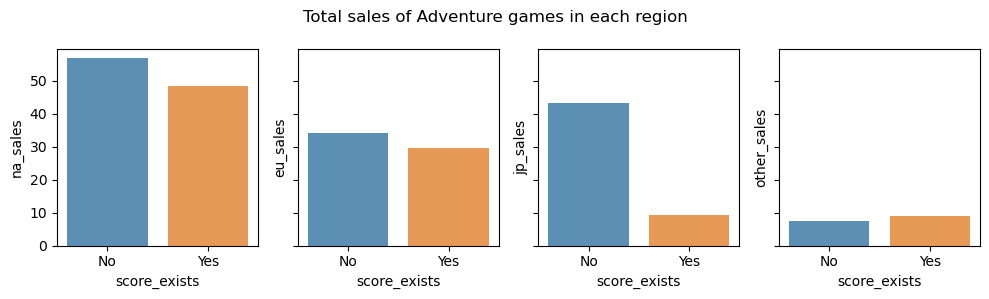

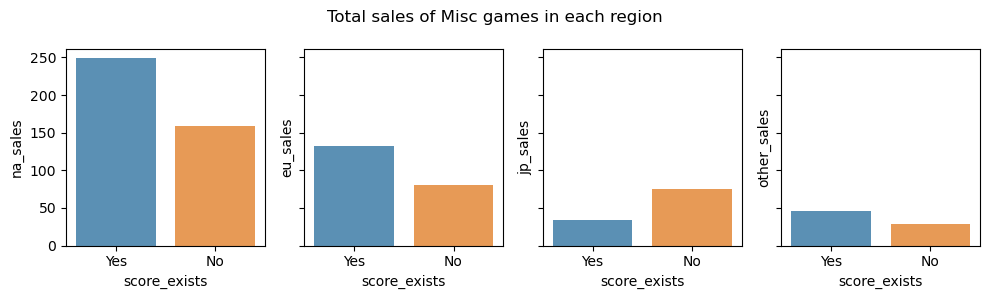

In [1226]:
for g in ['Adventure', 'Misc']:
    fig, axs = plt.subplots(1, 4, figsize=(10,3), sharey=True)
    for i, j in enumerate(['na_sales', 'eu_sales', 'jp_sales', 'other_sales']):
        sns.barplot(data.query('genre == @g'), x='score_exists', y=j, ax=axs[i], 
                    estimator='sum', errorbar=None, alpha=0.8)
    fig.suptitle('Total sales of '+ g + ' games in each region')
    plt.tight_layout()
    plt.show()

* На рынке Японии, преобладают продажи игр жанра _Adventure_ без рейтинга.
* А на на рынке Сев. Америки и Европы, продается игр жанра _Misc_ без рейтинга в 1.5 раза больше, чем с рейтингом.

## "user_score"

Вывожу уникальные значения.

In [1227]:
data.user_score.sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Присутствуют пропуски 2-х типов: 'tbd' и NaN.\
Из-за строкового TBD не прошла конвертация в числовой формат.

Количество пропусков каждого типа: \
TBD и NaN

In [1228]:
len(data.query('user_score == "tbd"')), len(data[data.user_score.isna()])

(2424, 6699)

Ищу в Интернете, что значит TBD.

Сайт https://www.metacritic.com/faq

> WHAT DOES "TBD" MEAN?
To Be Determined.
To help ensure that METASCORES accurately reflect the reviews given by critics for any particular movie, game, television show or album, we do not display a METASCORE for those items that do not have at least four (4) reviews in our database. Once this minimum number of reviews is reached, the METASCORE will display.

Т.е. TBD ставится тогда, когда кол-во оценок недостаточно.

TBD перевожу в NaN.

In [1229]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')

Проверка:

In [1230]:
data.user_score.sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

## "rating"
Возрастной рейтинг

Вывожу уникальные значения.

In [1231]:
data.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Все ОК.

---
Количество пропусков

In [1232]:
len(data[data.rating.isna()])

6764

Проверяю гипотезу, что пропуски свзязаны с ранним годом выхода игры.\
ESRB основана в 1994 г.

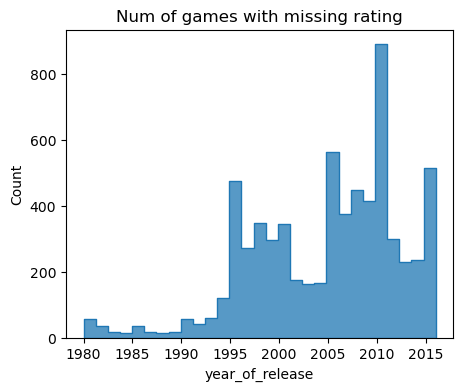

In [1233]:
plt.figure(figsize=(5,4))
sns.histplot(data[data.rating.isna()], x='year_of_release', element='step');
plt.title('Num of games with missing rating');

---
Проверяю на наличие зависимостей между пропусками в рейтинге и другими признаками.\
Для этого создаю столбец с бинарным признаком: Рейтинг есть = True / Рейтинга нет = False

In [1234]:
data['rating_exists'] = np.where(data.critic_score.isna(), 'No', 'Yes')

---
Количество игр по жанрам

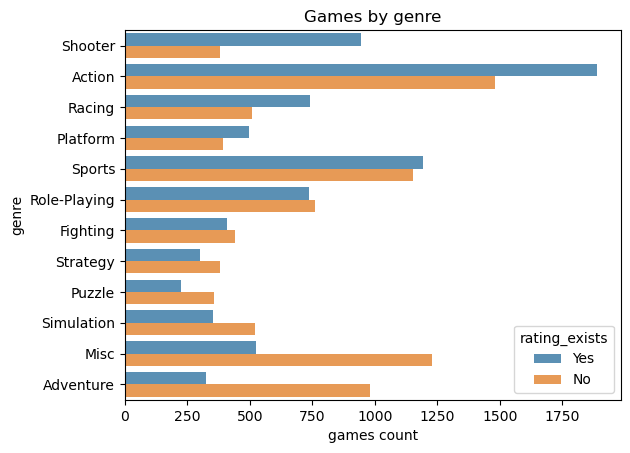

In [1235]:
genre =  data.genre.unique()

sns.countplot(data, y='genre', hue='rating_exists', alpha=0.8,
              order=genre[[6, 8, 2, 1, 0, 3, 9, 11, 4, 7, 5, 10]])
plt.xlabel('games count')
plt.title('Games by genre');

Получил распределение схожее с "critic_score".\
Снова лидируют жанры Adventure и Misc с большим перекосом в сторону отсутствия рейтинга.

Пропуски заменяю заглушкой - n/a

In [1236]:
data.rating.fillna('n/a', inplace=True)

data.rating.sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'n/a'],
      dtype=object)

In [1237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   total_sales      16713 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       7590 non-null   float64
 11  rating           16713 non-null  object 
 12  score_exists     16713 non-null  object 
 13  rating_exists    16713 non-null  object 
dtypes: float64(8), object(6)
memory usage: 1.9+ MB


# Исследовательский анализ данных

## Сколько игр выпускалось в разные годы

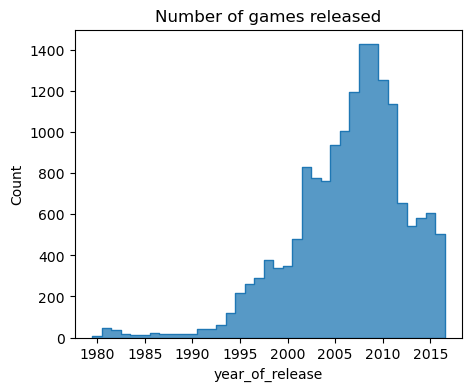

In [1238]:
fig, ax = plt.subplots(figsize=(5,4))
sns.histplot(data, x='year_of_release', discrete=True, element='step')
plt.title('Number of games released');

**Вопрос:** \
Важны ли данные за все периоды?\
**Ответ:** \
Думаю данными до 1994 года можно точно пренебречь ввиду их малочисленности.

## Как менялись продажи по платформам

**Задание:** \
Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. 

Группирую базу данных и нахожу сумму продаж по каждому типу платформы.\
Оставляю только топ 10.

In [1239]:
top_platforms = data.groupby('platform').total_sales.sum().nlargest(10)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

Строю распределения по 7-ми платформам из топа.\
По каждой платформе нахожу сумму продаж за 2016 год в зависимости от года выпуска игр.

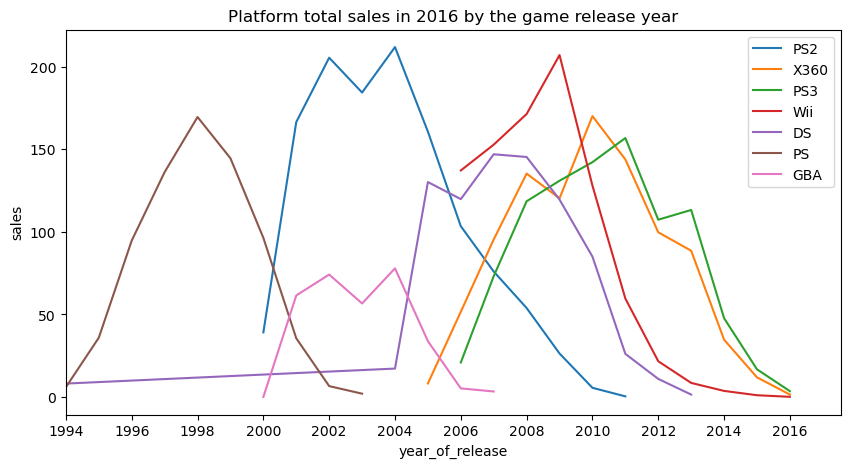

In [1240]:
fig = plt.figure(figsize=(10,5))

for i in top_platforms.index[:7]:
    data.query('platform == @i').groupby('year_of_release').total_sales.sum().plot(label=i)

plt.xlim(1994)
plt.xticks(ticks=range(1994,2017,2))
plt.ylabel('sales')
plt.legend()
plt.title('Platform total sales in 2016 by the game release year')
plt.show()

**Вопрос:** \
За какой характерный срок появляются новые и исчезают старые платформы?\
**Ответ:** \
Срок жизни платформы порядка 7 лет.  
Оцениваю промежуток между началом продаж и спадом продаж до начального уровня.\
[получается, что стрела времени на графике обращена назад]

## Актуальный период для анализа

Для анализа имеет смысл брать период не больше срока жизни платформы.\

Беру 6 лет: 2011-2016.

Удаляю ненужные для анализа данные:

In [1241]:
data = data.query('2011 <= year_of_release <= 2016')
data = data.reset_index(drop=True)

In [1242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4022 entries, 0 to 4021
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   float64
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   total_sales      4022 non-null   float64
 9   critic_score     1812 non-null   float64
 10  user_score       2032 non-null   float64
 11  rating           4022 non-null   object 
 12  score_exists     4022 non-null   object 
 13  rating_exists    4022 non-null   object 
dtypes: float64(8), object(6)
memory usage: 440.0+ KB


## Потенциально прибыльные платформы

Сводная таблица с продажами c 2011 по 2016 год по каждой платформе

In [1243]:
data.pivot_table(index='year_of_release', 
                 columns='platform', 
                 values='total_sales', aggfunc=sum)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011.0,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012.0,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Эти платформы убираю из дальнейшего рассмотрения из-за отсутствия данных или низких продаж
- DC;
- PS2;
- PSP;
- Wii

In [1244]:
data = data.query('platform != ["DS","PS2","PSP","Wii"]')

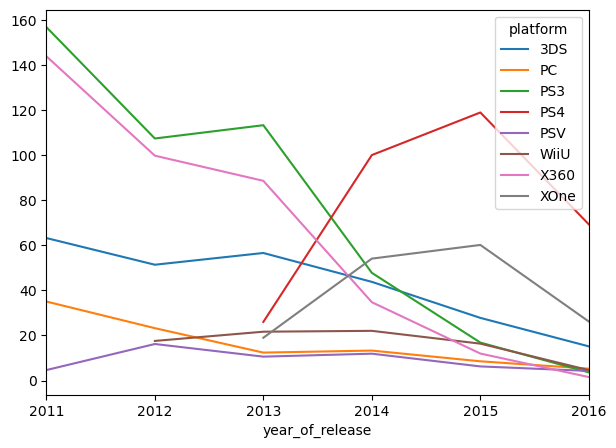

In [1245]:
# Сводная таблица с продажами по годам по каждой платформе

(data.pivot_table(index='year_of_release', 
                columns='platform', 
                values='total_sales', aggfunc=sum).plot(figsize=(7,5)))
plt.xlim(2011,2016)
plt.show()

Потенциально прибыльные платформы:

1. PS4
2. XOne

Показали рост продаж с 2013 по 2015.  
Остальные платформы продемонстрировали спад.

За 2016 год все платформы демонстрируют спад.  
Причина:  
Не достаточно времени для игры 2016 года выпуска показать продажи в 2016 году.  
Неполные данные за 2016.

## График «ящик с усами»

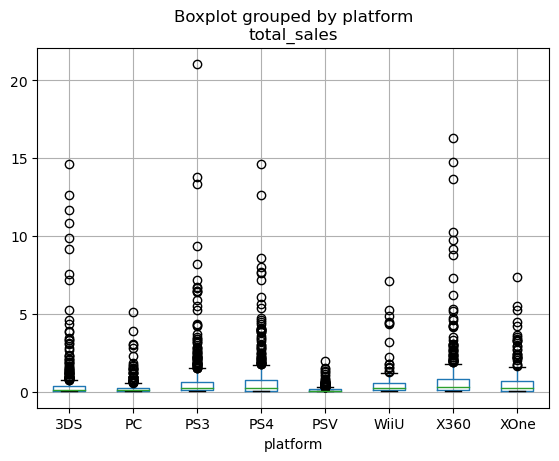

In [1246]:
data.boxplot('total_sales',by='platform')
plt.show()

Плохо видно "ящики" из-за аутлайеров.  

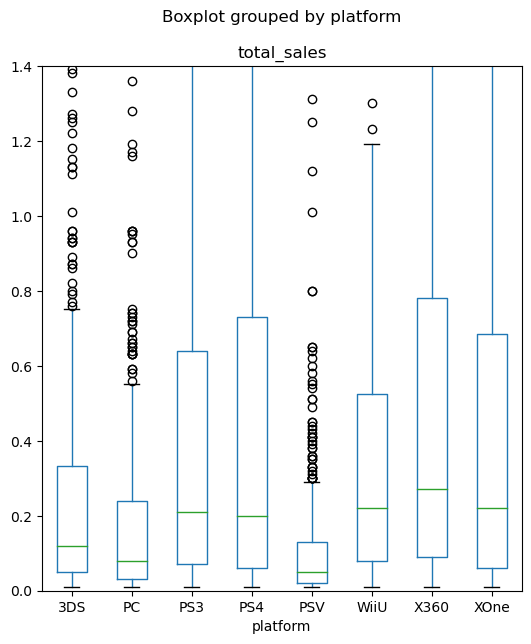

In [1247]:
data.boxplot('total_sales',by='platform', figsize=(6,7), grid=False)
plt.ylim(0, 1.4)
plt.show()

Все распределения имеют сильную положительную скошенность. Что было видно уже при загрузке данных.\
Для анализа продаж лучше использовать медианное значение.\
Медианное значение X360 самое высокое.

## Влияние отзывов на продажи

**Платформа PS4, как популярная**

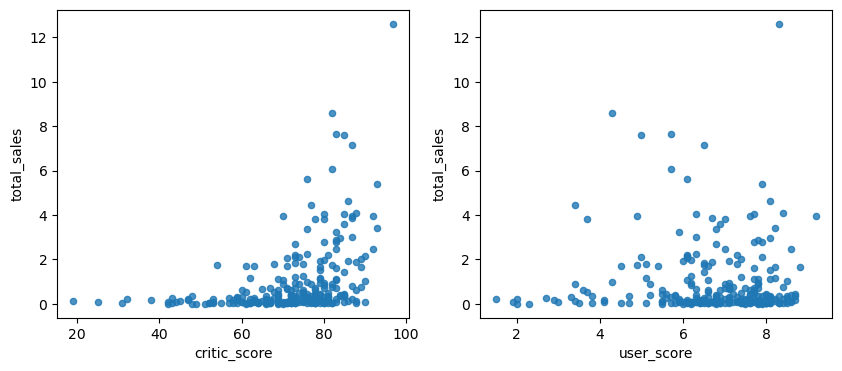

In [1248]:
data_score = data.loc[data.platform == 'PS4']

fig, axes = plt.subplots(1, 2, figsize=(10,4))
data_score.plot.scatter('critic_score','total_sales', ax=axes[0], alpha=0.8)
data_score.plot.scatter('user_score','total_sales',ax=axes[1], alpha=0.8);

Коэффициент корреляции 

In [1249]:
display(f'Оценка критиков = {data_score.critic_score.corr(data_score.total_sales)}',
        f'Оценка пользователей = {data_score.user_score.corr(data_score.total_sales)}')

'Оценка критиков = 0.40656790206178123'

'Оценка пользователей = -0.03195711020455644'

Слабая положительная корреляция для оценки критиков.  
Корреляция отсутствует для оценки пользователей.

**Платформа X360, демонстрирующая большое падение продаж**

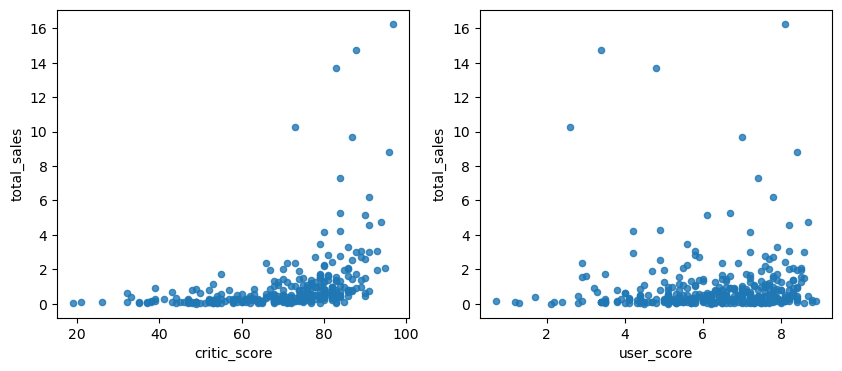

In [1250]:
data_score = data.loc[data.platform == 'X360']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
data_score.plot.scatter('critic_score','total_sales', ax=axes[0], alpha=0.8)
data_score.plot.scatter('user_score','total_sales',ax=axes[1] , alpha=0.8);

In [1251]:
display(f'Оценка критиков = {data_score.critic_score.corr(data_score.total_sales)}',
        f'Оценка пользователей = {data_score.user_score.corr(data_score.total_sales)}')

'Оценка критиков = 0.39125332454845557'

'Оценка пользователей = 0.038918170729102614'

+/- таже картина:  
Слабая положительная корреляция для оценки критиков.  
Корреляция отсутствует для оценки пользователей.

Вывод:  
Лучше ориентироваться на отзывы критиков при анализе потенциальной прибыльности продукта

## Распределение продаж по жанрам

Для анализа беру медианное значение, так как распределение сильно скошено вправо (см. выше).

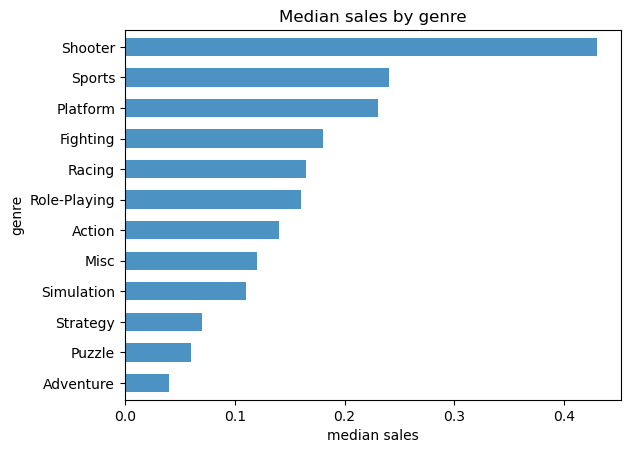

In [1252]:
data.groupby('genre').total_sales.median().sort_values().plot.barh(alpha=0.8, width=0.6)
plt.title('Median sales by genre')
plt.xlabel('median sales');

Стрелялки в топе.  
2 и 3 места делят платформеры и спорт.

## Популярные жанры

Суммирую продажи по жанрам в каждом регионе

In [1253]:
df = data.groupby('genre')[['na_sales','eu_sales','other_sales','jp_sales']].sum()

Абсолютные значения перевожу в доли от суммы общих продаж по каждому региону

In [1254]:
df = df/(df.sum())*100

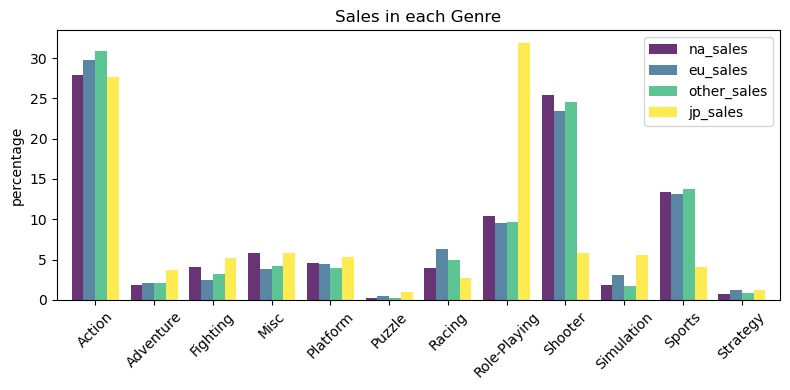

In [1255]:
df.plot.bar(figsize=(8,4), width=0.8, rot=45, colormap="viridis", alpha=0.8)
plt.title('Sales in each Genre')
plt.xlabel(None), plt.ylabel('percentage')
plt.tight_layout();

Пользователей можно разделить на 2 группы:
- Япония;
- Остальные страны.

Ключевые отличия -- Япония от отстальных:
- Страсть к ролевым играм;
- Нелюбовь к стрелялкам и спорту; 

Ничего не поделать -- ментальность :)

## Популярные платформы

Суммирую продажи по платформам в каждом регионе

In [1256]:
df = data.groupby('platform')[['na_sales','eu_sales','other_sales','jp_sales']].sum()

Абсолютные значения перевожу в доли от суммы общих продаж по каждому региону

In [1257]:
df = df/(df.sum())*100

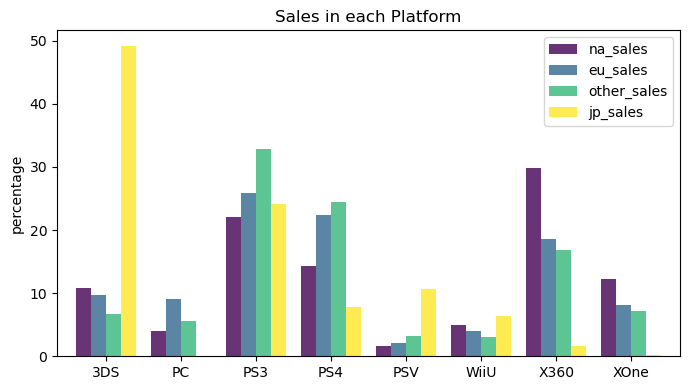

In [1258]:
df.plot.bar(figsize=(7,4), width=0.8, rot=0, colormap="viridis", alpha=0.8)
plt.title('Sales in each Platform')
plt.xlabel(None), plt.ylabel('percentage')
plt.tight_layout();

Здесь видно разделение по всем 4-м группам:

Но Япония снова особняком.\
Платформа 3DC, которая в остальных группах на последнем месте, в Японии на 1-м. 

## Популярные возрастные рейтинги

Суммирую продажи по возрастному рейтингу в каждом регионе

In [1259]:
df = data.groupby('rating')[['na_sales','eu_sales','other_sales','jp_sales']].sum()

Абсолютные значения перевожу в доли от суммы общих продаж по каждому региону

In [1260]:
df = df/(df.sum())*100

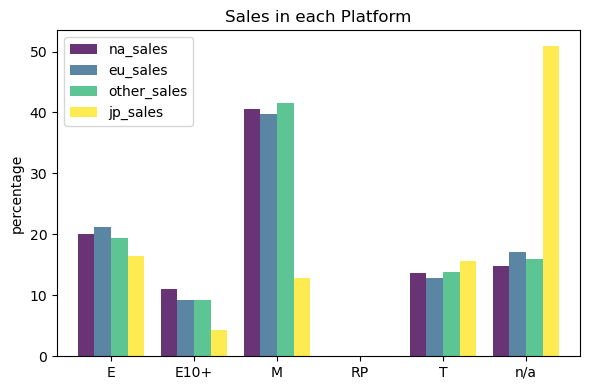

In [1261]:
df.plot.bar(figsize=(6,4), width=0.8, rot=0, colormap="viridis", alpha=0.8)
plt.title('Sales in each Platform')
plt.xlabel(None), plt.ylabel('percentage')
plt.tight_layout();

Касательно рейтинга RP:

https://www.xbox.com  
RP (Rating Pending) have been submitted to the ESRB and are awaiting final rating. This symbol appears only in advertising prior to a game's release.

т.е. RP можно не рассматривать

Рейтинги в базе данных

In [1262]:
data.rating.sort_values().unique()

array(['E', 'E10+', 'M', 'RP', 'T', 'n/a'], dtype=object)

Рейтинг с сортировкой от детского к взрослому контенту

In [1263]:
pd.DataFrame({'Age': ['Everyone', '10 and over', '13 and over', '17 and over','Rating missing', 'Rating Pending']},
            index=['E', 'E10+', 'T', 'M', 'n/a','RP'])

,Age
E,Everyone
E10+,10 and over
T,13 and over
M,17 and over
n/a,Rating missing
RP,Rating Pending


**Регионы NA, EU, Others**  
Игры для самых взрослых "M" - наибольшие продажи. Взрослые любят взрослый контент.  
Продаж в этой категории добавляют и тинейджеры, играющие во "взрослые" игры.  
2-я по популярности - категория "E" - игры для всех возрастов.  
Берёт своей самой большой аудиторией.  ~~

**Регион JP**  
Более миролюбивые игроки.  
В топе - детские игры и игры для тинейджеров.

Большая часть программ без рейтинга приходится на Японский рынок.

Выясняю причину.

Строю распределение программ без рейтинга по платформам и жанрам.

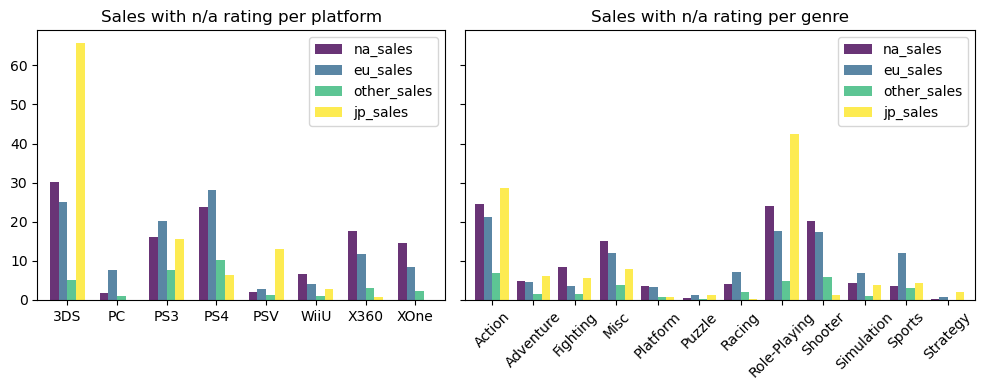

In [1264]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharey=True, width_ratios=(8,10))

df = data.query('rating == "n/a"').groupby('platform').sum(numeric_only=True).iloc[:,[1,2,4,3]]
df.plot.bar(ax= ax1, colormap="viridis", alpha=0.8, rot=0, width=0.7)
ax1.set_title('Sales with n/a rating per platform')
ax1.set_xlabel(None)

df = data.query('rating == "n/a"').groupby('genre').sum(numeric_only=True).iloc[:,[1,2,4,3]]
df.plot.bar(ax= ax2, colormap="viridis", alpha=0.8, rot=45, width=0.8)
ax2.set_title('Sales with n/a rating per genre')
ax2.set_xlabel(None)
plt.tight_layout()

Основная часть программ без рейтинга приходится на платформу 3DC, популярную в Японии и не популярную в других регионах.

## Проверка Гипотез

### Гипотеза 1

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Считаю, что генеральные совокупности - независимые.

Формулирую нулевую гипотезу:

*H0 = ген.совокупности имеют одинаковое среднее.*

Принимаю alpha = 5 %

Проверяю двустороннюю гипотезу

In [1265]:
XOne_sample = data.query('platform == "XOne" and ~user_score.isna()').user_score
PC_sample = data.query('platform == "PC" and ~user_score.isna()').user_score

# Размер выборок

len(XOne_sample), len(PC_sample)

(182, 307)

In [1266]:
# Выборки неодинаковые по размеру, поэтому equal_var=False

st.ttest_ind (XOne_sample, PC_sample, equal_var=False)

Ttest_indResult(statistic=0.5060666492177487, pvalue=0.6130712247638477)

**Результат:**

p-value >> alpha (0.05)  
Н0 не отвергнута.  
Средние рейтинги платформ одинаковые.


### Гипотеза 2

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Считаю, что генеральные совокупности - независимые.

Формулирую нулевую гипотезу:

*H0 = ген.совокупности имеют одинаковое среднее.*

Принимаю alpha = 5 %

Проверяю двустороннюю гипотезу

In [1267]:
action_sample = data.query('genre == "Action" and ~user_score.isna()').user_score
sports_sample = data.query('genre == "Sports" and ~user_score.isna()').user_score

# Размер выборок

len(action_sample), len(sports_sample)

(634, 231)

In [1268]:
# Выборки сильно неодинаковые по размеру, поэтому equal_var=False

st.ttest_ind (action_sample, sports_sample, equal_var=False)

Ttest_indResult(statistic=9.529913781044852, pvalue=3.282930541405523e-19)

**Результат:**

p-value << alpha (0.05)  
Н0 отвергнута.  
Средние рейтинги жанров НЕ одинаковые.


## Общий вывод

- Потенциально прибыльные платформы - PS4, XOne
- Экшн и Стрелялки - самые популярные жанры.
- Нет корреляции между продажами и отзывами пользователей. 
- Слабая положительная корреляция с оценками критиков.
- Игры для самой взрослой аудитории - самые популярные. Второе место - игры для всех возрастов.
- Поведение Японского пользователя отличается от остальных регионов и по жанрам и по платформам.

**Добавил:**

- Распределения продаж по всем платформам имеют сильную положительную скошенность. Медиана < Среднего. Оценку прибыльности лучше проводить по медианному значению.
- Резкое нарастание кол-ва выпускаемых игр с 1-й половины 90-х до средины 2000-х.
- Срок жизни платформы порядка 7 лет.
- Большое количество пропусков в рейтинге приходится на Японию и связано с популярной там платформой 3DS.

